In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data=pd.read_csv("clean_data_for_analysis.csv")

In [3]:
data

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [4]:
features=data[['Release', 'Runtime', 'Genre', 'Budget', 'Platform']]
features

,Release,Runtime,Genre,Budget,Platform
0,2018-01-05,6180.0,Horror,10000000.0,others
1,2018-01-05,5700.0,Action,NaN,others
2,2018-04-06,6780.0,Adventure,NaN,others
3,2018-01-12,6240.0,Action,30000000.0,others
4,2018-01-12,5460.0,Comedy,NaN,others
...,...,...,...,...,...
1148,2022-12-16,11520.0,Action,350000000.0,others
1149,2022-12-21,6120.0,Animation,90000000.0,others
1150,2022-12-30,6360.0,Documentary,NaN,others
1151,2022-12-23,11340.0,Comedy,78000000.0,others


In [5]:
convert_to_unix = lambda x: int(datetime.strptime(x, '%Y-%m-%d').timestamp())

features['Release']=features['Release'].apply(convert_to_unix)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19125/2456918480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Release']=features['Release'].apply(convert_to_unix)


In [41]:
# Create a OneHotEncoder for Genre
encoder = OneHotEncoder()
genre=features['Genre']
one_hot = encoder.fit_transform(features[['Genre']])
one_hot_df = pd.DataFrame(one_hot.toarray())
df_genre=pd.concat([genre, one_hot_df], axis=1)

df_genre['Genre']=genre
df_genre=df_genre.drop(columns='Genre')
df_genre.columns=encoder.categories_

In [7]:
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()
platform=features['Platform']
one_hot = encoder.fit_transform(features[['Platform']])
one_hot_df = pd.DataFrame(one_hot.toarray())
df_platform = pd.concat([platform, one_hot_df], axis=1)

df_platform['Platform']=platform
df_platform=df_platform.drop(columns='Platform')
df_platform.columns=encoder.categories_

In [9]:
df_platform

,amazon,disney,hulu,netflix,others
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1148,0.0,0.0,0.0,0.0,1.0
1149,0.0,0.0,0.0,0.0,1.0
1150,0.0,0.0,0.0,0.0,1.0
1151,0.0,0.0,0.0,0.0,1.0


# Drop the NaN from original data and merge the data together

In [10]:
colum_names_1=[i[0] for i in df_genre.columns]#Because names are tuples from encoder object
# column_names_2=[i[0] for i in df_platform.columns]
df_genre.columns=colum_names_1
# df_platform.columns=column_names_2


no_nan_features=features.dropna(how='any')
no_nan_features_genre=no_nan_features.drop(columns='Genre')
no_nan_features=pd.concat([no_nan_features_genre, df_genre], join='inner', axis=1)

In [11]:
no_nan_features

,Release,Runtime,Budget,Platform,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
0,1515139200,6180.0,10000000.0,others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1515744000,6240.0,30000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1516348800,7800.0,35000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1516348800,8400.0,30000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1516348800,6480.0,3500000.0,others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1148,1671177600,11520.0,350000000.0,others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,1671609600,6120.0,90000000.0,others,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,1671782400,11340.0,78000000.0,others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
labels=data['Metascore']
labels

0       49.0
1       26.0
2       88.0
3       56.0
4       54.0
        ... 
1148    67.0
1149    73.0
1150    71.0
1151    60.0
1152    51.0
Name: Metascore, Length: 1153, dtype: float64

In [13]:
first_set=pd.concat([no_nan_features, labels], join='inner', axis=1)
first_set=first_set.drop(columns='Platform')
first_set=first_set.dropna()

first_set

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller,Metascore
0,1515139200,6180.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,1515744000,6240.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
7,1516348800,7800.0,35000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
8,1516348800,8400.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
9,1516348800,6480.0,3500000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
1148,1671177600,11520.0,350000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
1149,1671609600,6120.0,90000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0
1151,1671782400,11340.0,78000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [14]:
# first_set=preprocessing.StandardScaler().fit_transform(first_set)

In [15]:
first_set.shape

(485, 20)

In [16]:
X_train, X_test, y_train, y_test=train_test_split(first_set.iloc[:,:19], first_set.iloc[:,19], train_size=.70)

In [17]:
X_train

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
710,1622185200,5820.0,55000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1084,1665730800,6660.0,20000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
191,1542355200,8040.0,200000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
702,1621580400,8880.0,70000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,1556866800,7500.0,40000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1669190400,7860.0,16000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1516348800,8400.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1119,1668758400,7620.0,100000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,1526626800,7140.0,110000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [19]:
# making predictions
predictions = model.predict(X_test)

In [20]:
predictions

array([61.86790501, 73.2619414 , 51.97780115, 69.06094197, 56.41338906,
       79.89870659, 60.60318927, 61.84083373, 53.10008952, 60.69532604,
       53.65643478, 55.74515952, 52.29413327, 87.92810714, 59.19324945,
       47.53221953, 48.30064524, 48.83522063, 59.81528744, 59.31975753,
       56.60215876, 60.68647234, 64.87175342, 57.29167119, 57.37039875,
       69.25116262, 46.90952719, 46.71187119, 46.86105965, 49.83798663,
       59.44631391, 57.3805038 , 60.51470615, 55.38975294, 65.4347353 ,
       65.95388274, 54.59170671, 45.42687536, 55.01127186, 51.8649862 ,
       54.96225367, 51.95100484, 60.77367524, 45.52831213, 55.40019427,
       55.39985051, 61.92394905, 66.41685375, 54.618104  , 51.91460017,
       45.51077548, 56.64607967, 53.77158555, 55.0005833 , 50.87824069,
       54.27557446, 55.71398464, 76.98442126, 53.58690105, 50.4023813 ,
       65.90279905, 62.58941359, 52.29068543, 63.89541946, 54.87497408,
       48.31590753, 74.23430886, 47.15242633, 61.59530083, 57.85

In [21]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  222.49394823604365
mean_absolute_error :  12.233744206186408


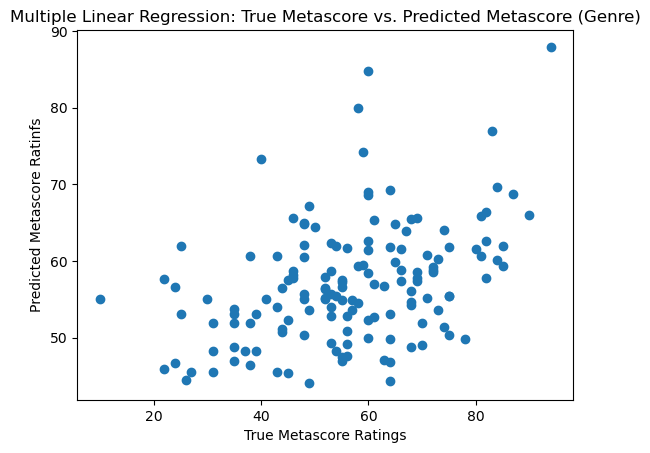

<Figure size 640x480 with 0 Axes>

In [23]:
plt.scatter(y_test, predictions)
plt.xlabel("True Metascore Ratings")
plt.ylabel("Predicted Metascore Ratinfs")
plt.title("Multiple Linear Regression: True Metascore vs. Predicted Metascore (Genre)")
plt.show()

plt.savefig("MLR True vs Predicted (Genre)")

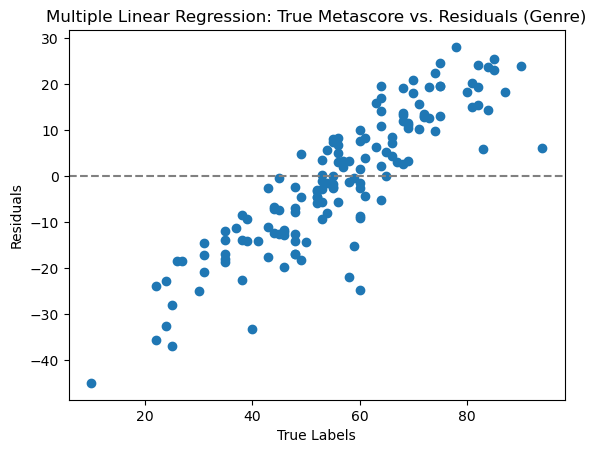

<Figure size 640x480 with 0 Axes>

In [25]:
residuals = y_test - predictions

plt.scatter(y_test, residuals)
plt.xlabel("True Labels")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.title("Multiple Linear Regression: True Metascore vs. Residuals (Genre)")
plt.show()

plt.savefig("MLR True vs Residuals (Genre)")

# Same Analysis with Platform Variables

In [30]:
# colum_names_1=[i[0] for i in df_genre.columns]#Because names are tuples from encoder object
# df_genre.columns=colum_names_1



no_nan_features=features.dropna(how='any')
no_nan_features_platform=no_nan_features.drop(columns='Platform')
no_nan_features=pd.concat([no_nan_features_platform, df_platform], join='inner', axis=1)

column_names_2=[i[0] for i in df_platform.columns]
df_platform.columns=column_names_2


no_nan_features=features.dropna(how='any')
no_nan_features_platform=no_nan_features.drop(columns='Platform')
no_nan_features=pd.concat([no_nan_features_platform, df_platform], join='inner', axis=1)

In [31]:
second_set=pd.concat([no_nan_features, labels], join='inner', axis=1)
second_set=second_set.drop(columns='Genre')
second_set=second_set.dropna()

second_set

,Release,Runtime,Budget,a,d,h,n,o,Metascore
0,1515139200,6180.0,10000000.0,0.0,0.0,0.0,0.0,1.0,49.0
3,1515744000,6240.0,30000000.0,0.0,0.0,0.0,0.0,1.0,56.0
7,1516348800,7800.0,35000000.0,0.0,0.0,0.0,0.0,1.0,54.0
8,1516348800,8400.0,30000000.0,0.0,0.0,0.0,0.0,1.0,49.0
9,1516348800,6480.0,3500000.0,0.0,0.0,0.0,0.0,1.0,36.0
...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,0.0,0.0,0.0,0.0,1.0,60.0
1148,1671177600,11520.0,350000000.0,0.0,0.0,0.0,0.0,1.0,67.0
1149,1671609600,6120.0,90000000.0,0.0,0.0,0.0,0.0,1.0,73.0
1151,1671782400,11340.0,78000000.0,0.0,0.0,0.0,0.0,1.0,60.0


In [32]:
X_train, X_test, y_train, y_test=train_test_split(second_set.iloc[:,:8], second_set.iloc[:,8], train_size=.70)


model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

array([64.8350849 , 48.6757283 , 50.39351889, 66.06187478, 56.33160619,
       51.32427851, 69.66833009, 56.45860813, 46.72100769, 52.76012065,
       60.44898731, 49.60587325, 53.93265885, 53.46256056, 50.87185365,
       64.0787691 , 64.31065819, 57.06800953, 65.77432657, 54.66221148,
       54.7922635 , 93.88886434, 54.12512232, 55.59146322, 51.71720897,
       67.91329962, 52.69750536, 53.73434102, 51.1387876 , 50.58704001,
       56.29557578, 48.71973584, 53.07234883, 63.37751767, 66.17455778,
       50.08343803, 65.12918188, 74.3813467 , 53.88442592, 55.47705396,
       54.90549514, 62.00839638, 60.14349899, 66.44266048, 59.12263121,
       59.09449243, 53.22914926, 52.61059513, 65.41374242, 58.89334478,
       57.16849752, 53.25216674, 60.0754065 , 49.12696553, 59.19962018,
       52.61294649, 50.02681218, 50.14130467, 49.58595003, 48.995514  ,
       51.28946723, 55.02057313, 52.50403284, 65.57119814, 57.33082547,
       55.22293423, 54.14987867, 56.72880241, 70.34812977, 61.69

In [33]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  274.05534891478266
mean_absolute_error :  13.76082902730267


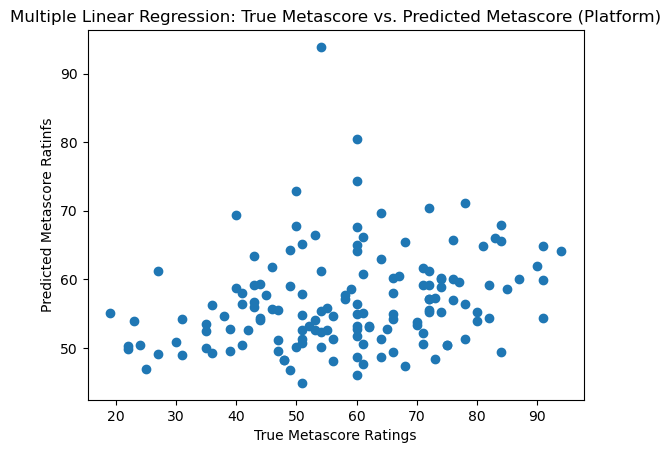

<Figure size 640x480 with 0 Axes>

In [34]:
plt.scatter(y_test, predictions)
plt.xlabel("True Metascore Ratings")
plt.ylabel("Predicted Metascore Ratinfs")
plt.title("Multiple Linear Regression: True Metascore vs. Predicted Metascore (Platform)")
plt.show()

plt.savefig("MLR True vs Predicted (Platform)")

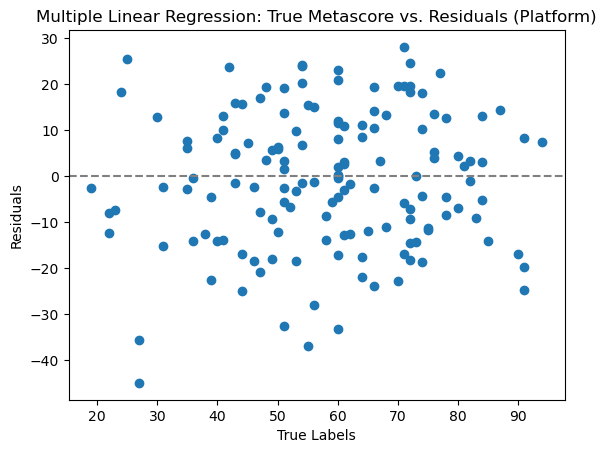

<Figure size 640x480 with 0 Axes>

In [35]:
plt.scatter(y_test, residuals)
plt.xlabel("True Labels")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.title("Multiple Linear Regression: True Metascore vs. Residuals (Platform)")
plt.show()

plt.savefig("MLR True vs Residuals (Platform)")

# MLPRegressor for Metascore

In [56]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [36]:
df_genre

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
no_nan_features=features.dropna(how='any')
no_nan_features_genre=no_nan_features.drop(columns='Genre')
no_nan_features=pd.concat([no_nan_features_genre, df_genre], join='inner', axis=1)


colum_names_1=[i[0] for i in df_genre.columns]#Because names are tuples from encoder object
# column_names_2=[i[0] for i in df_platform.columns]
df_genre.columns=colum_names_1
# df_platform.columns=column_names_2


first_set=pd.concat([no_nan_features, labels], join='inner', axis=1)
first_set=first_set.drop(columns='Platform')
first_set=first_set.dropna()

first_set

,Release,Runtime,Budget,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Sci-Fi,Thriller,Metascore
0,1515139200,6180.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,1515744000,6240.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
7,1516348800,7800.0,35000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
8,1516348800,8400.0,30000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
9,1516348800,6480.0,3500000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1671609600,7020.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
1148,1671177600,11520.0,350000000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
1149,1671609600,6120.0,90000000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0
1151,1671782400,11340.0,78000000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [45]:
labels=first_set['Metascore']
first_set=first_set.drop(columns='Metascore')
one_hots=first_set.iloc[:,3:19]
scaled=first_set.drop(columns=['Release', 'Runtime', 'Budget'])

scaled=preprocessing.StandardScaler().fit_transform(first_set.iloc[:,:3])

scaled

array([[-1.48852401, -0.65499763, -0.74911307],
       [-1.47602093, -0.60228918, -0.42641985],
       [-1.46351784,  0.76813062, -0.34574655],
       ...,
       [ 1.74620365, -0.70770609,  0.54165979],
       [ 1.74977596,  3.8779294 ,  0.34804386],
       [ 1.74977596,  1.50604898, -0.18439994]])

In [46]:
features=np.concatenate((scaled, one_hots), axis=1)

In [48]:
labels

0       49.0
3       56.0
7       54.0
8       49.0
9       36.0
        ... 
1144    60.0
1148    67.0
1149    73.0
1151    60.0
1152    51.0
Name: Metascore, Length: 485, dtype: float64

In [193]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, train_size=.70)

model = MLPRegressor(max_iter=1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([ 45.37186143,  59.08631409,  56.10039638,  66.48073949,
        60.87311723,  67.31156739,  46.05435459,  57.70035952,
        62.29923945,  52.42673832,  64.95281622,  49.85780856,
        65.22316219,  51.24889965,  64.12537112,  45.95858611,
        38.52115143,  67.82260335,  55.5905346 ,  50.34127935,
        49.90064501,  49.07083525,  59.82744023,  63.78303721,
        56.29256068,  56.23753015,  72.83344897,  55.41093935,
        58.54486118,  56.31432761,  50.08115417,  42.18286825,
        59.15434366,  55.60757113,  53.63761748,  54.22022917,
        60.32999516,  52.42369227,  57.35263874,  51.76122863,
        55.54891462,  90.21622413,  53.2074413 ,  56.91039621,
        51.39376246,  90.34025429,  54.24452175,  56.69221564,
        75.596306  ,  48.84578365,  55.39261364,  63.68035854,
        50.29017848,  60.40821028,  53.43485293,  60.73698797,
        59.07936152,  45.41050517,  53.1522025 ,  58.99685348,
        60.95692357,  62.90746466,  58.39407552,  59.54

In [194]:
mse = mean_squared_error(y_test, predictions)

In [195]:
mse

257.81156795351257

# MLPClassifier to Predict Genre based on Gross, Runtime, Metascore

In [57]:
data

#Selecting Features and Labels
subset=data[['Gross', 'Runtime', 'Metascore', 'Genre']]
subset=subset.dropna()

labels=subset['Genre']
features=subset.loc[:,:'Metascore']
features=preprocessing.StandardScaler().fit_transform(features)


labels=labels.to_numpy().reshape(-1,1)
labels=preprocessing.OneHotEncoder().fit_transform(labels)
labels=labels.toarray()

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [61]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, train_size=.70)

model = MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

predictions

/Users/jaredperez/opt/miniconda3/envs/flask_blog/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
model.score(X_test, y_test)

0.09829059829059829

In [67]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

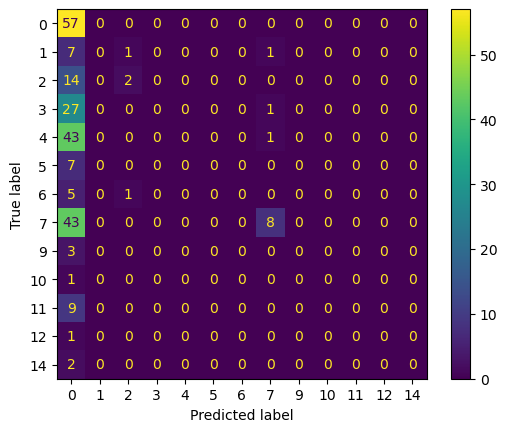

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), predictions.argmax(axis=1))


plt.savefig("Confusion Matrix")

# Its a terrrrrible

# A quick stats test on the mean gross before and after COVID across all movies for validation of data analysis

In [73]:
pre_covid=data.iloc[:450]
post_covid=data.iloc[450:]

In [74]:
post_covid=post_covid.reset_index(drop=True)

In [75]:
test=post_covid['Gross'].dropna(0).to_numpy()

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19125/1461022591.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  test=post_covid['Gross'].dropna(0).to_numpy()


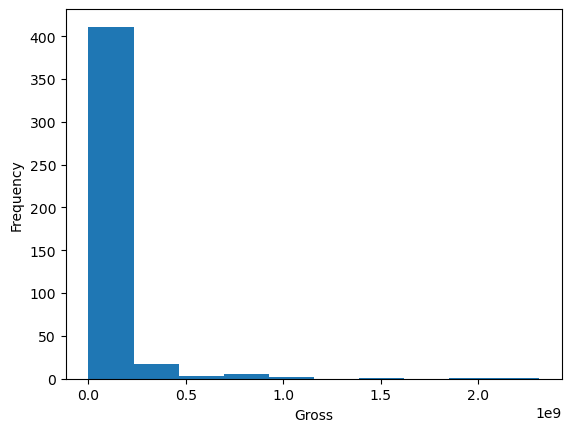

<Figure size 640x480 with 0 Axes>

In [83]:
plt.hist(test, bins=10)
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.show()

plt.savefig("Gross Histogram Post-Covid")

In [77]:
# Calculate mean, median, skewness, and kurtosis
mean = np.mean(test)
median = np.median(test)
skewness = stats.skew(test)
kurtosis = stats.kurtosis(test)

# Print results
print("Mean:", mean)
print("Median:", median)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 63095924.12244898
Median: 2217874.0
Skewness: 6.649098928561425
Kurtosis: 55.98974620118023


In [78]:
# Perform Shapiro-Wilk test...this test shows that the data is not normally distributed as supported by histograms
statistic, p_value = stats.shapiro(test)
print("Shapiro-Wilk test statistic:", statistic)
print("Shapiro-Wilk test p-value:", p_value)


Shapiro-Wilk test statistic: 0.3265306353569031
Shapiro-Wilk test p-value: 3.2776427132496044e-37


In [81]:
test_pre=pre_covid['Gross'].dropna(0).to_numpy()

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_19125/1055301663.py:1: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  test_pre=pre_covid['Gross'].dropna(0).to_numpy()


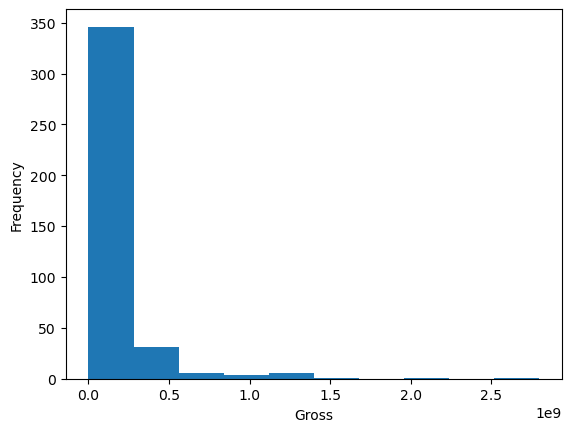

<Figure size 640x480 with 0 Axes>

In [84]:
plt.hist(test_pre, bins=10)
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.show()

plt.savefig("Gross Histogram Pre Covid")

In [22]:
# Calculate mean, median, skewness, and kurtosis
mean = np.mean(test_pre)
median = np.median(test_pre)
skewness = stats.skew(test_pre)
kurtosis = stats.kurtosis(test_pre)

# Print results
print("Mean:", mean)
print("Median:", median)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 125293588.52777778
Median: 22960699.0
Skewness: 4.733739510833031
Kurtosis: 30.288230064163983


In [25]:
# Perform Mann-Whitney U test because of lack of normality
u_stat, p_value = stats.mannwhitneyu(test, test_pre)

# Print results
print("U statistic:", u_stat)
print("p-value:", p_value)

U statistic: 58422.0
p-value: 1.2919847698469968e-16
